../eden/external/deeplabpytorch.py:47: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  CONFIG = Dict(yaml.load(open(config_path, 'rb')))


Device: GeForce GTX 1080 Ti
Network [SPADEGenerator] was created. Total number of parameters: 97.4 million. To see the architecture, do print(network).


/home/bzion/.local/share/virtualenvs/eden--Yj-kwub/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


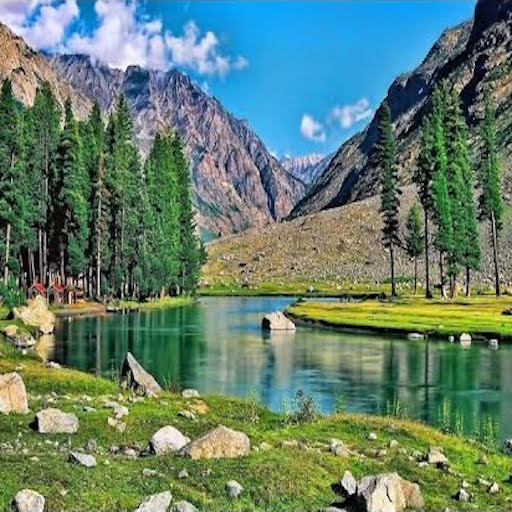

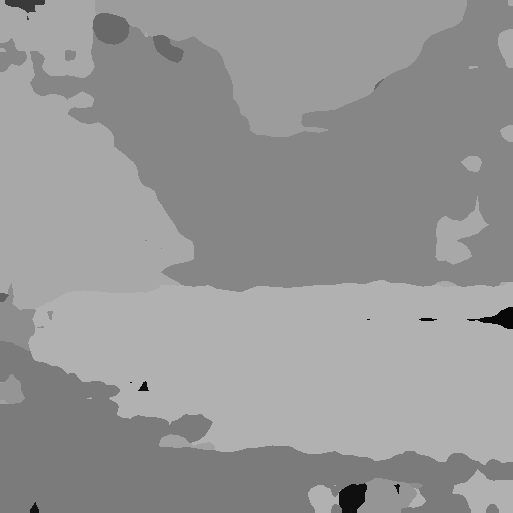

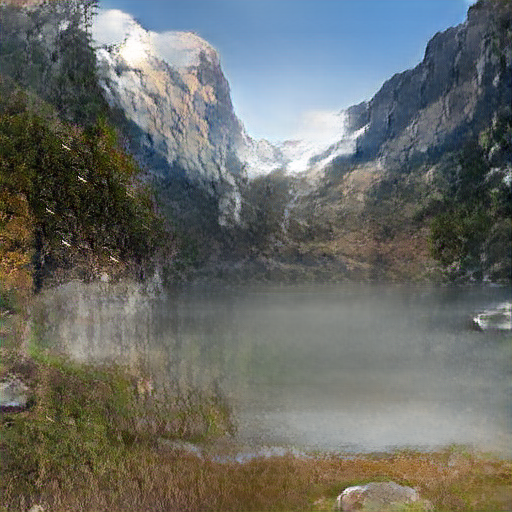

In [1]:
import sys
sys.path.insert(0, '..') # add root to python path

import eden.setup
from eden.utils import processing, dataset
from eden.external import deeplabpytorch
from eden.external import spade
import numpy as np

eden.setup.set_external_repos_root("../external")

data = dataset.ImageLoader()
img = data.load_image('../images/mountains.jpg')

deeplabpytorch.setup(deeplabpytorch.Config.cocostuff164k)
spade.setup('Labels2Landscapes_512')

labelmap = deeplabpytorch.run(img['data'])
labelmap_img = deeplabpytorch.labelmap_as_image(labelmap)
output = spade.run(labelmap)

processing.show(img['data'])
processing.show(labelmap_img)
processing.show(output)
